In [1]:
import numpy as np
from plots import plots

In [2]:
cosmo_params = {
    'redshift' : np.linspace(0,4),
    'frequency': np.linspace(10**0,10**4),
    'f_e' : 1,
    't_e' : 1,
    't_a' : 2,
}
phenom_params = {
    'A' : 1,
    'alpha' : 4,
    'lambda_g' : 1.6 * 10 ** 16,
}
wf_params = {
        'approximant': 'TaylorF2',
        'mass1': 10,
        'mass2': 15,
        'delta_f': 1.0 / 170, 
        'f_lower': 40,
}

In [3]:
plt = plots(cosmo_params, phenom_params, wf_params)

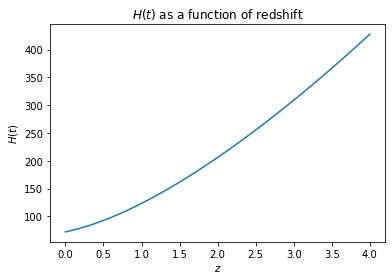

In [4]:
plt.scale_factor()